In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv("Zomato-data-.csv")

In [3]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
data.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [5]:
data.shape

(148, 7)

In [6]:
data.size

1036

In [7]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [9]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

data['rate']=data['rate'].apply(handleRate)
print(data.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [12]:
data.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

Text(0.5, 0, 'Type of Restuarent')

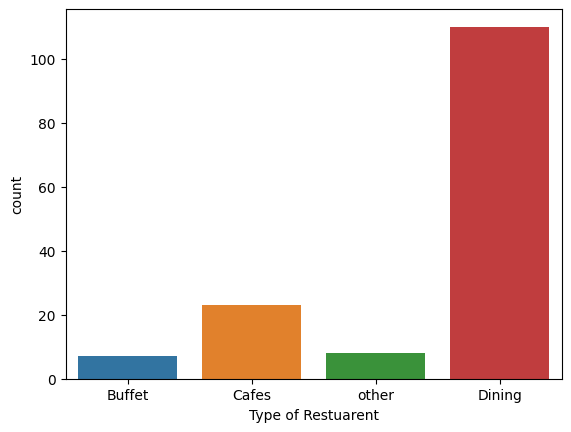

In [13]:
sb.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of Restuarent")

Text(0.5, 0, 'Online Order')

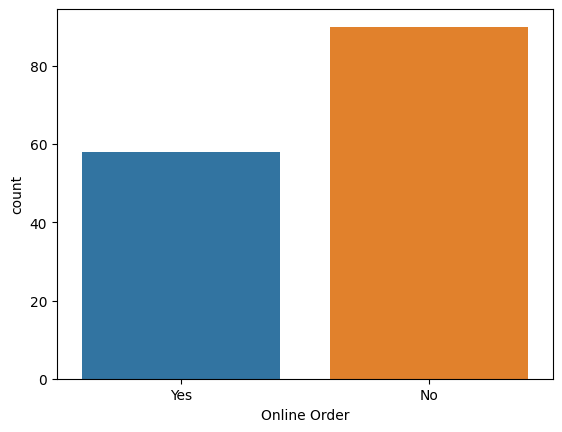

In [14]:
sb.countplot(x=data['online_order'])
plt.xlabel('Online Order')

Text(0.5, 0, 'Book Table ')

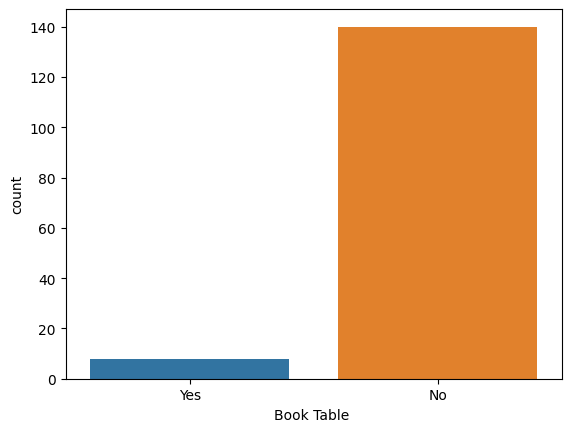

In [16]:
sb.countplot(x=data['book_table'])
plt.xlabel('Book Table ')

Text(0.5, 0, 'Votes graph')

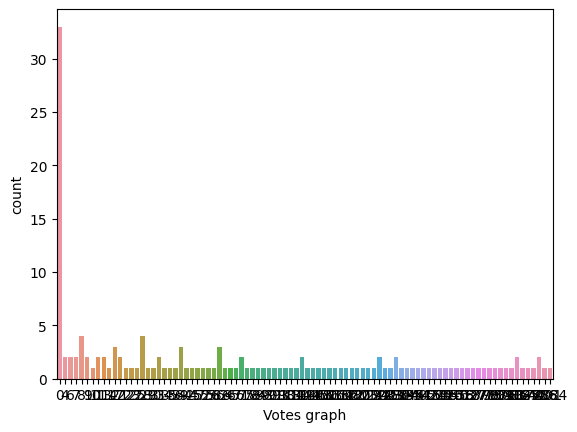

In [17]:
sb.countplot(x=data['votes'])
plt.xlabel('Votes graph')

Text(0, 0.5, 'Votes')

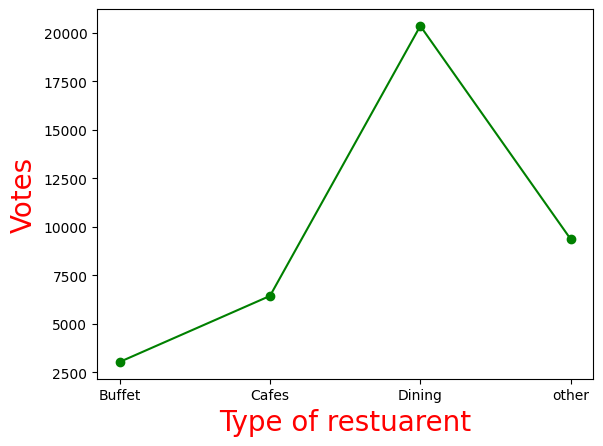

In [25]:
group_data=data.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restuarent', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

In [27]:
maximum_vote=data['votes'].max()

In [32]:
maximum_vote
restuarent_with_max_votes=data.loc[data['votes']==maximum_vote, 'name']

In [33]:
restuarent_with_max_votes

38    Empire Restaurant
Name: name, dtype: object

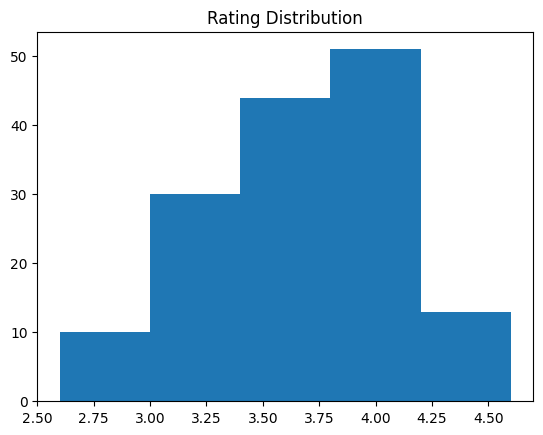

In [35]:
plt.hist(data['rate'], bins=5)
plt.title('Rating Distribution')
plt.show()

In [36]:
couple_data=data['approx_cost(for two people)']

<AxesSubplot: xlabel='approx_cost(for two people)', ylabel='count'>

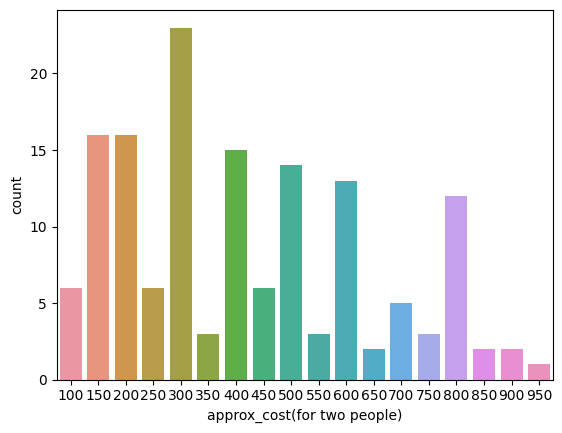

In [37]:
sb.countplot(x=couple_data)

<AxesSubplot: xlabel='online_order', ylabel='rate'>

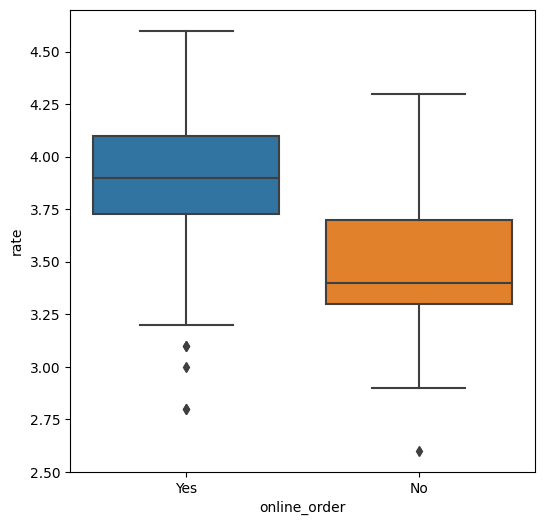

In [38]:
plt.figure(figsize=(6,6))
sb.boxplot(x='online_order', y='rate', data=data)

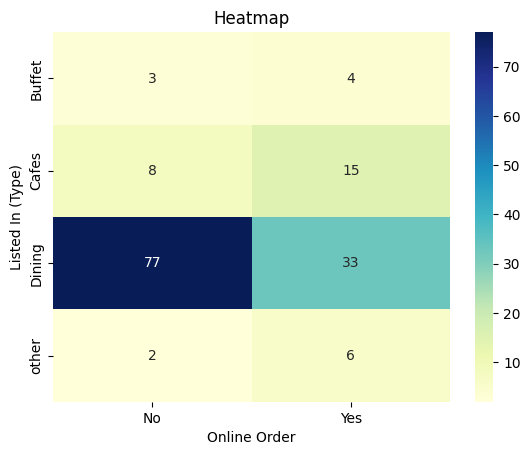

In [43]:
pivot_table = data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sb.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()
